# ALPI: Alarm Logs in Packaging Industry

Major tasks:
- Nexxt alerm forecasting
- Predicting alarms occurring in a future time frame
- Detecting abnormal eequipment conditions

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../datasets')

In [6]:
import alpi

# Overview of Raw Data

In [8]:
raw_data = pd.read_csv('../datasets/alpi/alarms_log_data/raw/alarms.csv')
raw_data.timestamp = pd.to_datetime(raw_data.timestamp)
raw_data

,timestamp,alarm,serial
0,2019-02-21 19:57:57.532,139,4
1,2019-02-21 19:58:28.293,139,4
2,2019-02-21 19:58:32.853,139,4
3,2019-02-21 19:59:05.387,139,4
4,2019-02-21 20:02:05.832,139,4
...,...,...,...
444829,2020-06-15 22:53:05.303,139,19
444830,2020-06-15 22:56:19.633,139,19
444831,2020-06-15 23:03:16.854,139,19
444832,2020-06-15 23:03:50.454,139,19


In [10]:
raw_data.nunique()

timestamp    444748
alarm           154
serial           20
dtype: int64

In [35]:
raw_data.groupby('serial').agg(['min', 'max'])['timestamp']

,min,max
serial,,
0,2019-09-12 16:31:26.632,2020-06-17 03:53:51.885
1,2019-02-21 15:56:43.356,2020-06-08 22:26:40.569
2,2019-02-21 12:36:46.507,2020-06-09 00:37:15.465
3,2019-02-21 10:16:18.130,2020-06-16 21:26:01.908
4,2019-02-21 19:57:57.532,2020-06-16 15:12:36.460
5,2019-02-21 18:30:10.378,2020-01-16 18:40:11.256
6,2019-02-21 12:56:14.339,2020-06-16 20:04:40.393
7,2019-02-21 12:57:16.213,2020-06-16 20:40:44.969
8,2019-02-21 12:30:23.150,2020-06-16 13:32:25.519


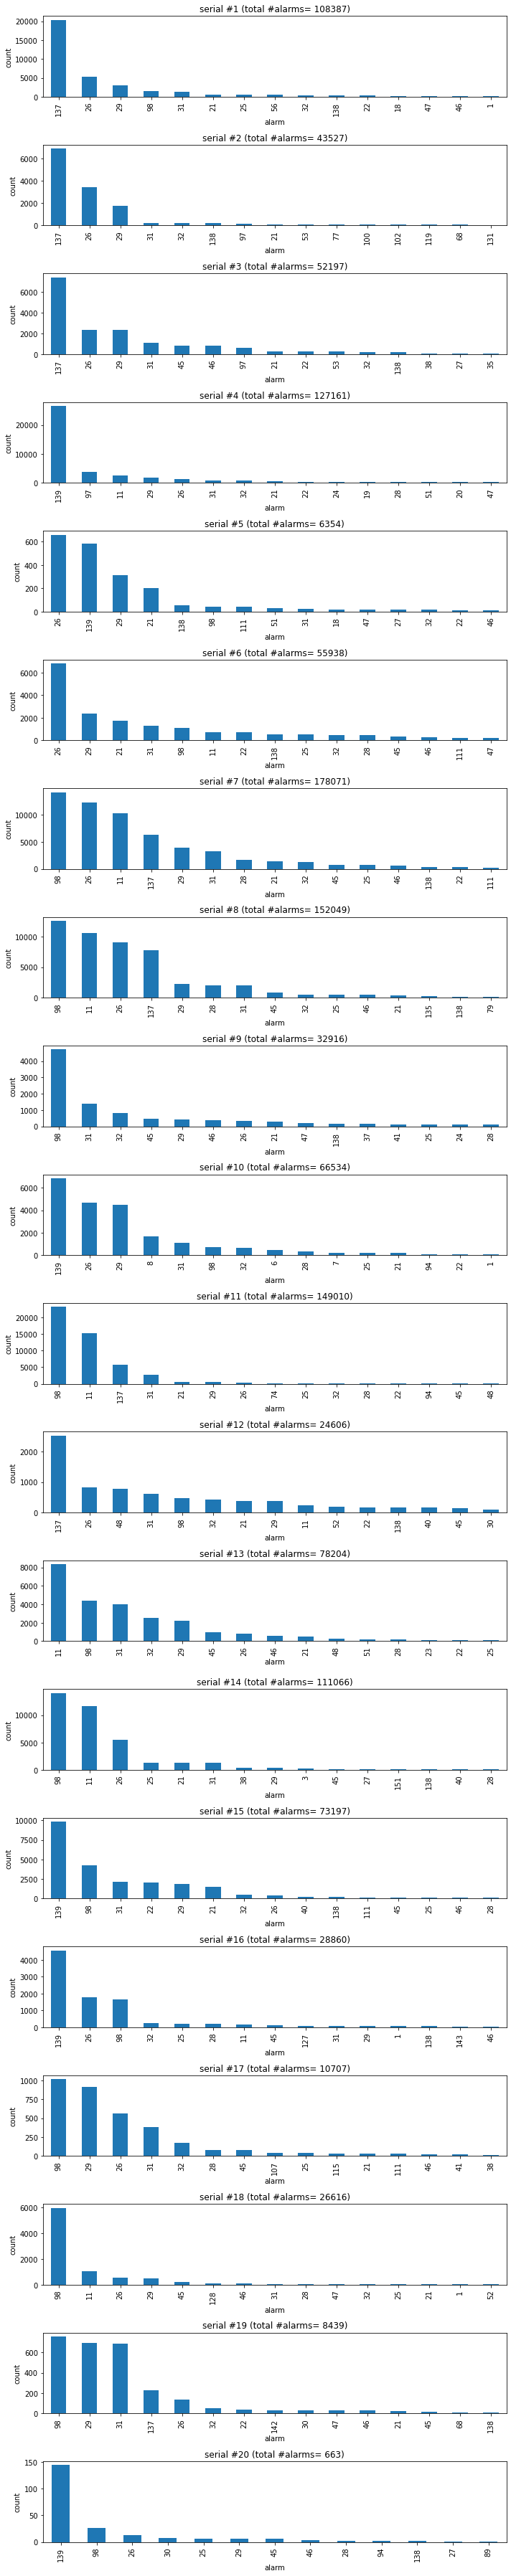

In [57]:
fig, ax = plt.subplots(raw_data.serial.nunique(), figsize=(10, 5 * 10))
topk = 15

for i, g in raw_data.groupby('serial'):
    g.groupby('alarm').count().sort_values(
        'serial', ascending=False).iloc[:topk].serial.plot.bar(ax=ax[i])

    ax[i].set_title('serial #{} (total #alarms= {})'.format(i+1, g.size))
    ax[i].set_ylabel('count')

fig.tight_layout()

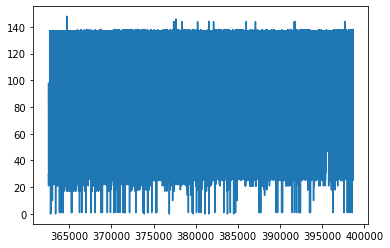

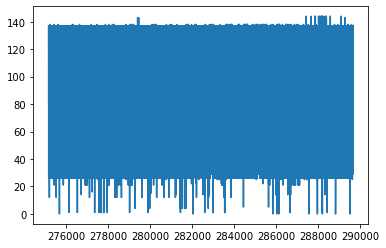

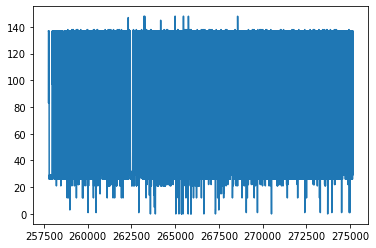

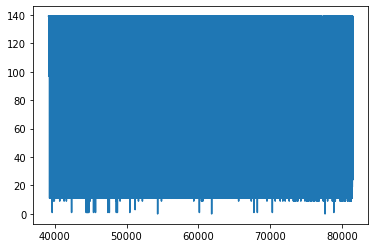

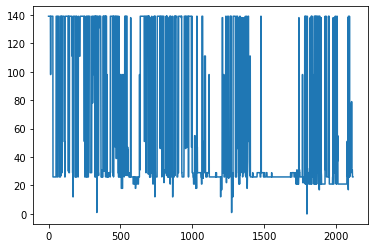

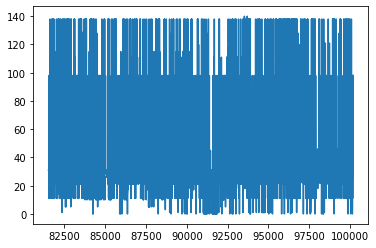

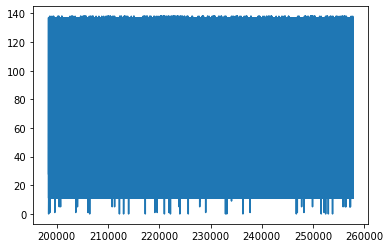

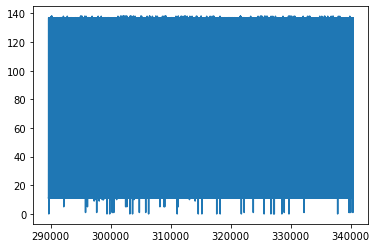

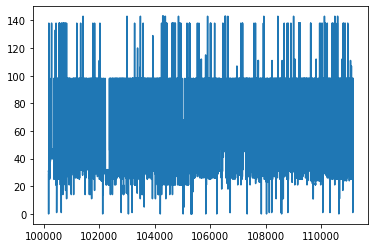

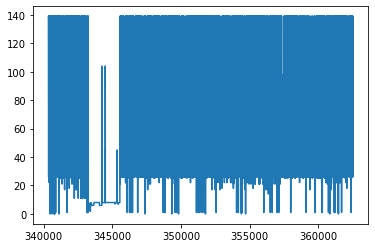

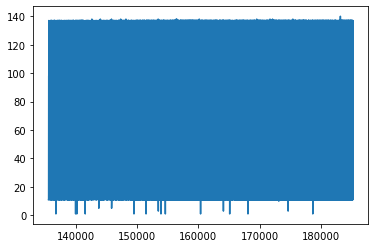

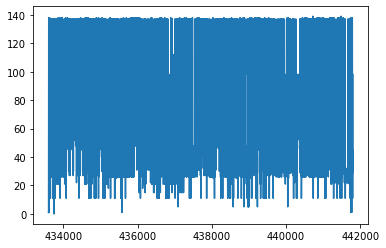

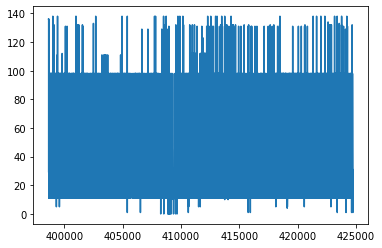

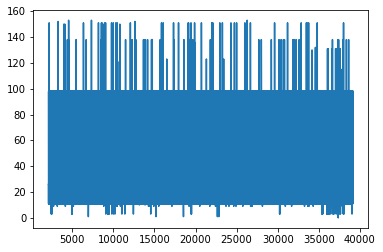

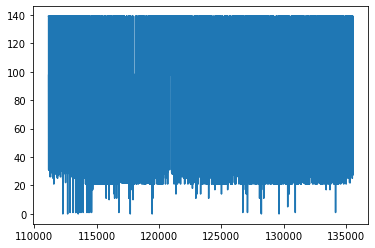

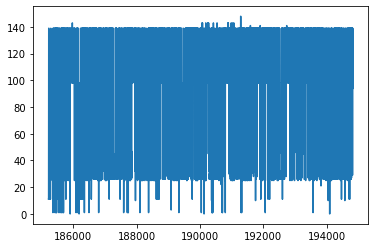

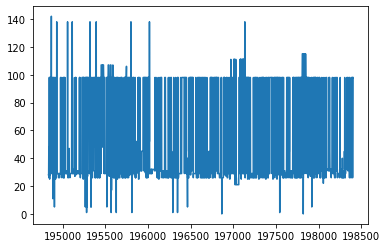

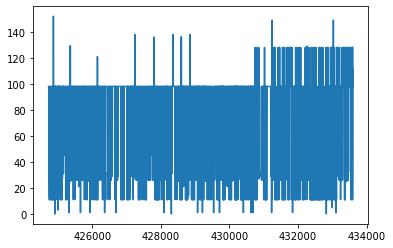

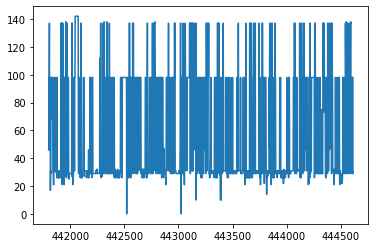

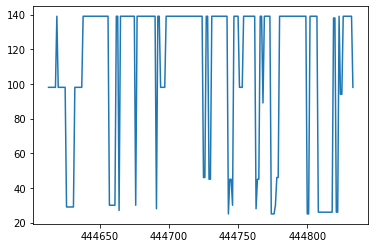

In [31]:
for i, g in raw_data.groupby('serial'):
    plt.plot(g.alarm)
    plt.show()

In [14]:
x_train, y_train, serials_train, x_test, y_test, serials_test = alpi.load_from_npz()


(41045, 109)

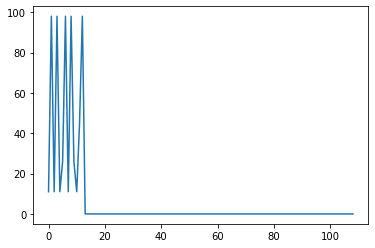

In [24]:
plt.plot(x_train[10])
x_train.shape

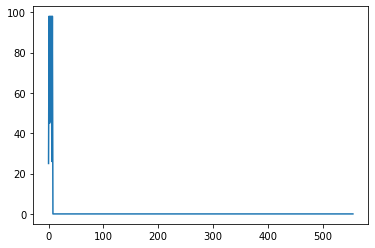

In [20]:
plt.plot(y_train[0])

(41045,)

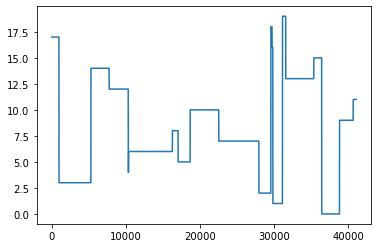

In [23]:
plt.plot(serials_train)
serials_train.shape